In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('home_data.csv')

In [3]:
dataset.shape

(21613, 21)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [104]:
X = dataset.iloc[:,3:9].values
y = dataset['price'].values

In [105]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [59]:
X

array([[-0.39873715, -1.44746357, -0.97983502, -0.22832133, -0.915427  ,
        -0.08717263],
       [-0.39873715,  0.1756067 ,  0.53363434, -0.18988538,  0.93650577,
        -0.08717263],
       [-1.47395936, -1.44746357, -1.42625404, -0.12329847, -0.915427  ,
        -0.08717263],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, -0.33213703,  0.93650577,
        -0.08717263],
       [-0.39873715,  0.50022075, -0.52252773, -0.30707641,  0.93650577,
        -0.08717263],
       [-1.47395936, -1.77207762, -1.15404732, -0.33875227,  0.93650577,
        -0.08717263]])

In [60]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

In [106]:
n = len(X)
X0 = np.ones(n)
newX = np.array([X0, X[:,0],X[:,1],X[:,2],X[:,3],X[:,4],X[:,5]])

In [107]:
newX.shape

(7, 21613)

In [108]:
newX = newX.T

In [109]:
newX.shape

(21613, 7)

In [68]:
b = np.zeros(newX.shape[1])

In [69]:
b

array([0., 0., 0., 0., 0., 0., 0.])

In [70]:
def costFunction(X,b,y):
    return np.sum((X.dot(b) - y) ** 2) / (2*n)

In [71]:
costFunction(newX,b,y)

10806.499999999844

In [72]:
def gradient_descent(X,y,b,epochs,alpha):
    cost_history = [0] * epochs
    for i in range(epochs):
        pred = X.dot(b)
        loss = pred - y
        grad = X.T.dot(loss) / n
        b = b - alpha * grad
        cost_history[i] = costFunction(X,b,y)
    
    return cost_history, b

In [73]:
b = np.zeros(newX.shape[1])
epochs = 10000
learning_rate = 0.001
cost,newb = gradient_descent(newX,y.flatten(),b,epochs,learning_rate)

In [74]:
newb

array([-1.96074602e-16, -1.23827666e-01,  5.28964768e-02,  7.12650496e-01,
       -3.71083496e-02, -5.77076176e-03,  1.89864937e-01])

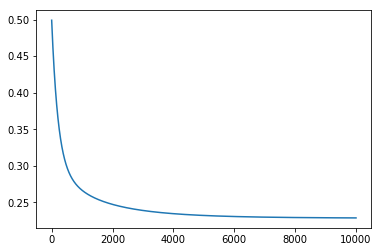

In [75]:
import matplotlib.pyplot as plt

plotx = [i for i in range(epochs)]
plt.plot(plotx,cost)
plt.show()

In [76]:
cost[-1]

0.22882748481772983

In [77]:
prediction = newX.dot(newb)

In [78]:
pred_transformed = sc.inverse_transform(prediction)

In [93]:
pred_transformed

array([272727.84012344, 695764.60704277, 203380.69405742, ...,
       267215.25945786, 427344.03490471, 267305.37989742])

In [110]:
x_train,x_test,y_train,y_test = train_test_split(newX,y,test_size=0.25)

In [111]:
x_train.shape

(16209, 7)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
y_pred = reg.predict(x_test)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(y_test, y_pred)

0.448313006129999

In [118]:
n = len(x_train)
X0 = np.ones(n)
newX2 = np.array([X0, x_train[:,0],x_train[:,1],x_train[:,2],x_train[:,3],x_train[:,4],x_train[:,5]])

In [119]:
x_train[:,1]

array([ 2.82692947,  0.67648506,  0.67648506, ..., -1.47395936,
       -1.47395936, -0.39873715])

In [121]:
newX2.shape

(7, 16209)

In [122]:
newX2 = newX2.T

In [124]:
b = np.zeros(newX2.shape[1])
epochs = 10000
learning_rate = 0.001
cost,newb = gradient_descent(newX2,y_train.flatten(),b,epochs,learning_rate)

In [126]:
cost[-1]

0.24478378455650962